# Task 4.10 Part 1 (notebook 2)

## Table of contents: 

### Q.1 Importing Data 

### Q.5 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

## Importing Data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
path = r'/Users/nurgul/Instacart Basket Analysis'

In [3]:
# Importing Data set customers.csv
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','ords_prods_customers_latest.pkl'))  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404847
Data columns (total 35 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   product_id                 int64  
 1   product_name               object 
 2   department_id              int64  
 3   prices                     float32
 4   order_id                   int64  
 5   user_id                    int64  
 6   order_number               int64  
 7   orders_day_of_week         int64  
 8   hour_of_day_ordered        int64  
 9   days_since_prior_order     float64
 10  add_to_cart_order          int64  
 11  reordered                  int64  
 12  price_range_loc            object 
 13  busiest_dat                object 
 14  Busiest_day                object 
 15  busiest_day                object 
 16  busiest_peroid_of_the_day  object 
 17  max_order                  int64  
 18  loyalty_flag               object 
 19  mean_spend                 float64
 20  spend

In [5]:
df.drop(columns=['busiest_dat', 'Busiest_day'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404847
Data columns (total 33 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   product_id                 int64  
 1   product_name               object 
 2   department_id              int64  
 3   prices                     float32
 4   order_id                   int64  
 5   user_id                    int64  
 6   order_number               int64  
 7   orders_day_of_week         int64  
 8   hour_of_day_ordered        int64  
 9   days_since_prior_order     float64
 10  add_to_cart_order          int64  
 11  reordered                  int64  
 12  price_range_loc            object 
 13  busiest_day                object 
 14  busiest_peroid_of_the_day  object 
 15  max_order                  int64  
 16  loyalty_flag               object 
 17  mean_spend                 float64
 18  spender_flag               object 
 19  median_order_frequency     float64
 20  order

### Q. 4 Is there a connection between age and family status in terms of ordering habits?

Order habits by age 

In [4]:
#Analyzing connection between age and spending power (income)
df_age_income = df[['age','income']]

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'age'), Text(0, 0.5, 'income')]

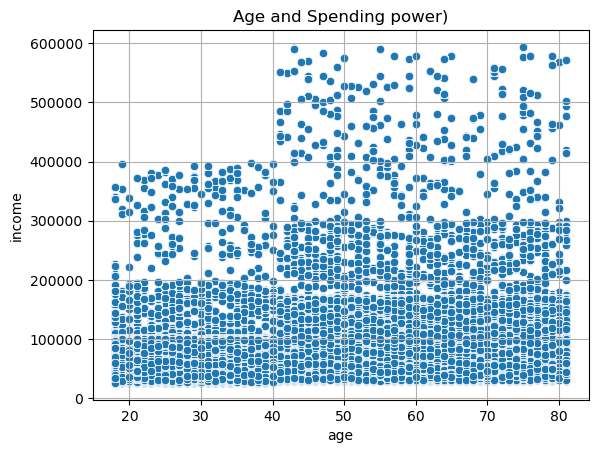

In [5]:
scatter_age_income = sns.scatterplot(x='age', y='income', data=df_age_income)
plt.grid()
plt.title('Age and Spending power)')
scatter_age_income.set(xlabel='age', ylabel='income')

Individuals under the age of 40 generally exhibit lower spending power in comparison to those aged 40 and above. The majority of customers between the ages of 20 and 40 report incomes up to 200 000 with a minimal percentage reaching 400 000. On the other hand, the majority of customers above age 40 have incomes around 300 000, while the remaining portion reports earnings up to 600 000.

In [6]:
# Exporting the chart 
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

In [7]:
#Analyzing connection between family status and spending power (income)
df_fam_status_income=df[['fam_status', 'income']]

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 23.52222222222222, 'fam_status'),
 Text(11.472222222222216, 0.5, 'income')]

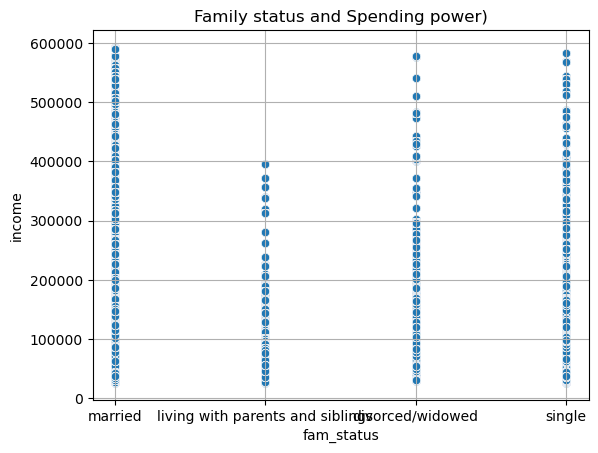

In [8]:
scatter_fam_status_income = sns.scatterplot(x='fam_status', y='income', data=df_fam_status_income)
plt.grid()
plt.title('Family status and Spending power)')
scatter_age_income.set(xlabel='fam_status', ylabel='income')

In [9]:
# Exporting the chart 
scatter_fam_status_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_fam_status_income.png'))

In [23]:
# Creating a dataframe to group the data by age_group and 'department_name'
df_grouped_age_dep = df.groupby(['department_name', 'age_flag']).size().unstack()

In [15]:
df_grouped_age_dep_sort = df_grouped_age_dep.sort_values(by = 'Old Adult', ascending = False)

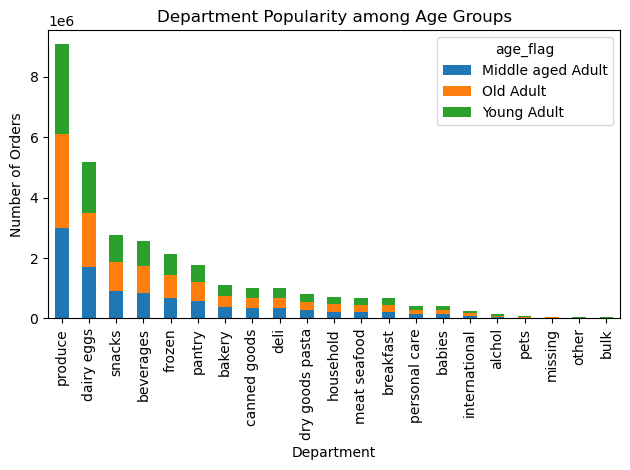

In [14]:
# Plot the data using a bar chart
bar_age_dep = df_grouped_age_dep_sort.plot(kind = 'bar', stacked = True)
plt.title('Department Popularity among Age Groups')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [15]:
# Exporting the chart 
bar_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_dep.png'))

In [16]:
# Creating a dataframe to group the data by family status and 'department_name'
df_grouped_fam_dep = df.groupby(['department_name', 'fam_status']).size().unstack()

In [17]:
df_grouped_fam_dep.head()

fam_status,divorced/widowed,living with parents and siblings,married,single
department_name,,,,
alchol,11859,8379,99421,24968
babies,34351,19381,287683,68977
bakery,95735,53684,785749,185660
beverages,220879,119107,1807453,424462
breakfast,56590,33198,471220,109842


In [18]:
df_grouped_fam_dep_sort = df_grouped_fam_dep.sort_values(by = 'married', ascending = False)

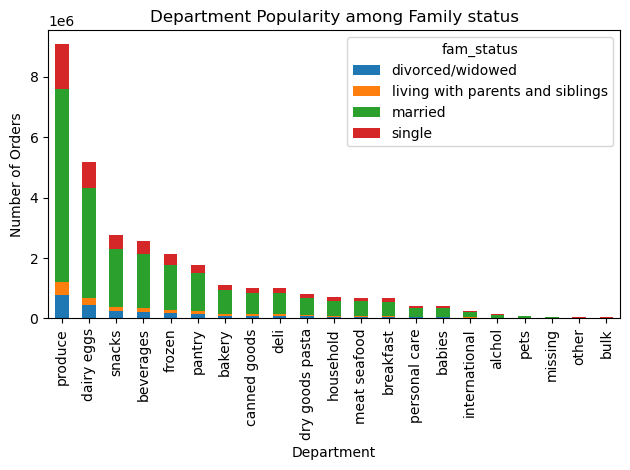

In [19]:
# Plot the data using a bar chart
bar_fam_dep = df_grouped_fam_dep_sort.plot(kind = 'bar', stacked = True)
plt.title('Department Popularity among Family status')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [20]:
# Exporting the chart 
bar_fam_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_dep.png'))

In [21]:
#Creating flag based on dependants
df.loc[df['n_dependants'] == 0, 'dependants_flag'] = "No children"
df.loc[df['n_dependants'] >= 1, 'dependants_flag'] = "Has children"

/var/folders/b1/dcgm49cs1dx0p3lkf95fklvr0000gp/T/ipykernel_72048/2842311125.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No children' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['n_dependants'] == 0, 'dependants_flag'] = "No children"


(array([0, 1]), [Text(0, 0, 'Has children'), Text(1, 0, 'No children')])

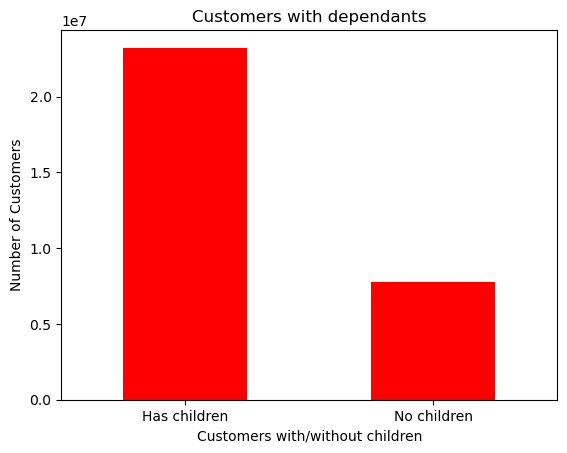

In [22]:
# Creating a bar chart showing inviduals with dependants
bar_dependants = df['dependants_flag'].value_counts().plot.bar(title = 'Customers with dependants', xlabel = 'Customers with/without children', ylabel = 'Number of Customers', color = 'red')
plt.xticks(rotation=0)

In [23]:
# Exporting bar chart 
bar_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependants.png'))

In [24]:
# Creating a dataframe to group the data by family status and 'department_name'
df_grouped_n_depend_dep = df.groupby(['department_name', 'dependants_flag']).size().unstack()

In [25]:
df_grouped_n_depend_dep.head()

dependants_flag,Has children,No children
department_name,,
alchol,107800,36827
babies,307064,103328
bakery,839433,281395
beverages,1926560,645341
breakfast,504418,166432


In [26]:
df_grouped_n_depend_dep_sort = df_grouped_n_depend_dep.sort_values(by = 'Has children', ascending = False)

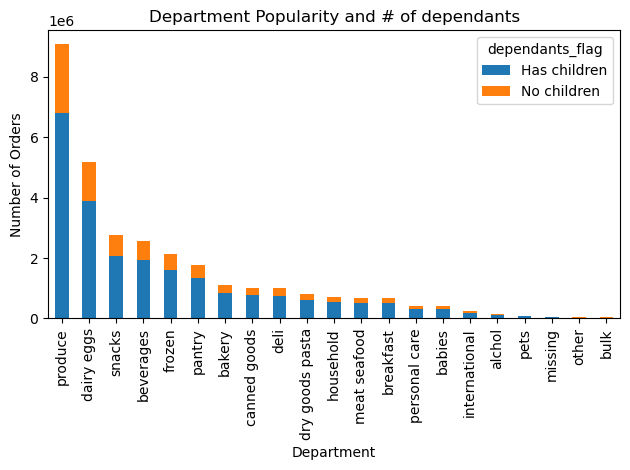

In [27]:
# Plot the data using a bar chart
bar_n_depend_dep = df_grouped_n_depend_dep_sort.plot(kind = 'bar', stacked = True)
plt.title('Department Popularity and # of dependants')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [28]:
# Exporting the chart 
bar_n_depend_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_n_depend_dep.png'))

In [29]:
# Create a list holding True/False values to the test np.random.rant()<=0.7
np.random.seed(4)
dev=np.random.rand(len(df))<= 0.7

In [30]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [31]:
np.random.rand(10)

array([0.40196087, 0.10262327, 0.49905822, 0.76022198, 0.8841328 ,
       0.70943956, 0.41872088, 0.11397028, 0.00622199, 0.26237651])

In [32]:
# Store 70% of the sample in the dataframe big 
big=df[dev]

In [33]:
# Store 30% of the sample in the dataframe small 
small=df[~dev]

In [34]:
len(df)

30964564

In [35]:
len(big)+len(small)

30964564

In [36]:
df_2=small[['orders_day_of_week', 'prices', 'fam_status', 'age_flag']]

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

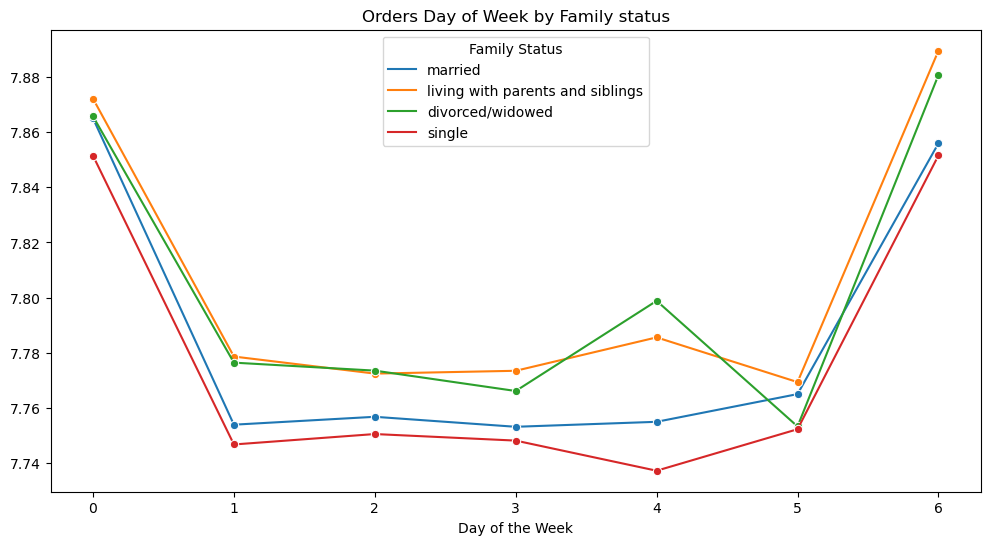

In [37]:
# Creating Line chart 
plt.figure(figsize=(12, 6))
line = sns.lineplot(data=df_2, x='orders_day_of_week', y='prices', hue='fam_status', errorbar = None, marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('')
plt.title('Orders Day of Week by Family status')
plt.legend(title='Family Status')
plt.show()

In [38]:
# Exporting line chart 
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_odw_fam.png'))

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

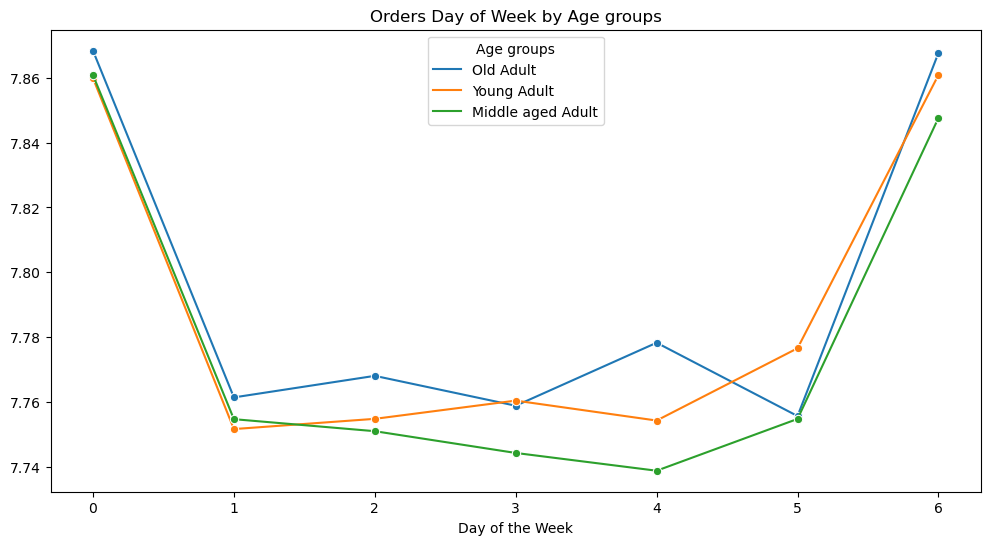

In [39]:
# Creating Line chart 
plt.figure(figsize=(12, 6))
line_2 = sns.lineplot(data=df_2, x='orders_day_of_week', y='prices', hue='age_flag', errorbar = None, marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('')
plt.title('Orders Day of Week by Age groups')
plt.legend(title='Age groups')
plt.show()

In [40]:
# Exporting line chart 
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_odw_age.png'))

In [41]:
# Export data to pkl
df.to_pickle(os.path.join(path,'02 Data/Prepared Data/ords_prods_customers_final.pkl'))

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404847
Data columns (total 34 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   product_id                 int64  
 1   product_name               object 
 2   department_id              int64  
 3   prices                     float32
 4   order_id                   int64  
 5   user_id                    int64  
 6   order_number               int64  
 7   orders_day_of_week         int64  
 8   hour_of_day_ordered        int64  
 9   days_since_prior_order     float64
 10  add_to_cart_order          int64  
 11  reordered                  int64  
 12  price_range_loc            object 
 13  busiest_day                object 
 14  busiest_peroid_of_the_day  object 
 15  max_order                  int64  
 16  loyalty_flag               object 
 17  mean_spend                 float64
 18  spender_flag               object 
 19  median_order_frequency     float64
 20  order